In [1]:
import numpy as np
import pandas as pd

# Options List

In [166]:
optionGroups = []

optionGroups.append(['Total', ['nan']])
optionGroups.append(['Race and Hispanic Origin of Householder', ['White alone', '.White alone, not Hispanic', 'Black alone', 'Asian alone', 'Other (residual)', 'Hispanic origin (any race)', 'Not of Hispanic origin']])
optionGroups.append(['Nativity of Household Members', ['At least one foreign-born household member', 'Native']])
optionGroups.append(['Age of Householder', ['Less than 35 years', '35 to 44 years', '45 to 54 years', '55 to 64 years', '65 years and over', '.65 to 69 years', '.70 to 74 years', '.75 and over']])
optionGroups.append(['Age Composition of the Household', ['No children under 18', 'One or more children under 18', '.Youngest child under 5', '.Youngest child 5 to 9', '.Youngest child 10 to 18']])
optionGroups.append(['Highest Level of Educational Attainment in the Household', ['No high school diploma', 'High school graduate only', 'Some college, no degree', "Associate's degree", "Bachelor's degree", 'Graduate or professional degree']])
optionGroups.append(['Single-Person Households', ['Total', '.Less than 35 years', '.35 to 54 years', '.55 to 64 years', '.65 years and over']])
optionGroups.append(['Households of Any Size', ['Married-couple households', '.Less than 35 years', '.35 to 54 years', '.55 to 64 years', '.65 years and over', 'Male householder', '.Less than 35 years', '.35 to 54 years', '.55 to 64 years', '.65 years and over', 'Female householder', '.Less than 35 years', '.35 to 54 years', '.55 to 64 years', '.65 years and over']])
optionGroups.append(['Labor Force Activity of Household Members Under 65', ['At least one household member with labor force activity during the year', 'At least one household member who worked full-time for the entire year', 'At least one household member who workedpart-time during the year', 'At least one household member who was unemployed during the year', 'No labor force activity for any household member during the year']])
optionGroups.append(['Annual Household Income', ['Lowest quintile', 'Second quintile', 'Third quintile', 'Fourth quintile', 'Highest quintile']])
optionGroups.append(['Poverty Status', ['Household Income Below Poverty Threshold', 'Household Income Above Poverty Threshold']])
optionGroups.append(['Household Net Worth',['Negative or zero', '$1 to $4,999', '$5,000 to $9,999', '$10,000 to $24,999', '$25,000 to $49,999', '$50,000 to $99,999', '$100,000 to $249,999', '$250,000 to $499,999', '$500,000 and over']])
optionGroups.append(['Health Insurance Coverage of Household Members', ['Health insurance coverage for all household members all year', 'No Health insurance coverage for some or all household members during the year']])
optionGroups.append(['Disability of Household Members', ['No household member with a disability', 'One or more household members with a disability']])
optionGroups.append(['Participation in Government Programs', ['None', 'One or more', 'SNAP (food stamps)', 'Medicaid', 'Supplemental Security Income (SSI)', 'WIC']])
optionGroups.append(['Region', ['Northeast', 'Midwest', 'South', 'West']])
optionGroups.append(['Housing Tenure', ['Owner', 'Renter']])

optionGroups

[['Total', ['nan']],
 ['Race and Hispanic Origin of Householder',
  ['White alone',
   '.White alone, not Hispanic',
   'Black alone',
   'Asian alone',
   'Other (residual)',
   'Hispanic origin (any race)',
   'Not of Hispanic origin']],
 ['Nativity of Household Members',
  ['At least one foreign-born household member', 'Native']],
 ['Age of Householder',
  ['Less than 35 years',
   '35 to 44 years',
   '45 to 54 years',
   '55 to 64 years',
   '65 years and over',
   '.65 to 69 years',
   '.70 to 74 years',
   '.75 and over']],
 ['Age Composition of the Household',
  ['No children under 18',
   'One or more children under 18',
   '.Youngest child under 5',
   '.Youngest child 5 to 9',
   '.Youngest child 10 to 18']],
 ['Highest Level of Educational Attainment in the Household',
  ['No high school diploma',
   'High school graduate only',
   'Some college, no degree',
   "Associate's degree",
   "Bachelor's degree",
   'Graduate or professional degree']],
 ['Single-Person Households'

# Get Categories and Subcategories

In [11]:
#sheet = pd.read_excel('/Users/mtjen/desktop/debt_tables_cy2014.xlsx', header=[6,7,8,9])
test = pd.read_excel('/Users/mtjen/desktop/debt_tables_cy2014.xlsx', sheet_name = 2)
test.head(3)

,Table with row headers in column A and column headers in rows 4 through 5. (Leading dots indicate subparts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Table 3. Percent Distribution of Debt for Hous...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Characteristic,Number of Households (thousands),Household Debt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Zero Debt,"$1 to $4,999","$5,000 to $9,999","$10,000 to $24,999","$25,000 to $49,999","$50,000 to $99,999","$100,000 to $249,999","$250,000 to $499,999","$500,000 or over"


In [12]:
title = test.iloc[0, 0]

In [13]:
def get_categories(df):
    catIndices = []
    categories = []

    for rowIndex in range(len(df.columns)):
        value = str(df.iloc[1, rowIndex])
        if value != 'nan' and value != 'Characteristic':
            catIndices.append(rowIndex)
            categories.append(value)
            
    return([catIndices, categories])

In [14]:
res = get_categories(test)

indices = res[0]
categories = res[1]

print(indices)
print(categories)

[1, 2]
['Number of Households (thousands)', 'Household Debt']


In [15]:
def get_category_start_stop_indices(df, category_indices):
    startStop = []

    for index in range(len(category_indices)):
        startIndex = category_indices[index]
        if index != len(category_indices) - 1:
            stopIndex = category_indices[index + 1]
        else:
            stopIndex = len(df.columns) - 1

        startStopIndices = [startIndex, stopIndex]
        startStop.append(startStopIndices)

    return startStop

In [16]:
indexRes = get_category_start_stop_indices(test, indices)
indexRes

[[1, 2], [2, 10]]

In [17]:
def get_subcategories(df, category_start_stop_indices):
    subCategories = []

    for indices in category_start_stop_indices:
        start = indices[0]
        stop = indices[1]
        subCats = df.iloc[2, start:stop].values.tolist()
        subCategories.append(subCats)

    return subCategories

In [18]:
subcats = get_subcategories(test, indexRes)
subcats

[[nan],
 ['Zero Debt',
  '$1 to $4,999',
  '$5,000 to $9,999',
  '$10,000 to $24,999',
  '$25,000 to $49,999',
  '$50,000 to $99,999',
  '$100,000 to $249,999',
  '$250,000 to $499,999']]

In [19]:
def get_category_pairs(categories, subcategories):
    categoryPairs = []

    for index in range(len(categories)):
        cat = categories[index]
        subCats = subcategories[index]
        pairing = [cat, subCats]
        categoryPairs.append(pairing)

    # first is main category, second is the subcategories
    return categoryPairs

In [20]:
pairRes = get_category_pairs(categories, subcats)
pairRes

[['Number of Households (thousands)', [nan]],
 ['Household Debt',
  ['Zero Debt',
   '$1 to $4,999',
   '$5,000 to $9,999',
   '$10,000 to $24,999',
   '$25,000 to $49,999',
   '$50,000 to $99,999',
   '$100,000 to $249,999',
   '$250,000 to $499,999']]]

In [23]:
def get_sheet_categories(df):
    title = df.iloc[0, 0]
    
    # get categories and indices
    res = get_categories(test)
    indices = res[0]
    categories = res[1]
    
    # get start stop indices
    indexRes = get_category_start_stop_indices(df, indices)
    
    # get subcategories
    subcats = get_subcategories(test, indexRes)
    
    # get category pairings
    pairRes = get_category_pairs(categories, subcats)
    
    # get sheet categories
    sheetCategories = [title, pairRes]
    
    return sheetCategories

In [24]:
get_sheet_categories(test)

['Table 3. Percent Distribution of Debt for Households, by Amount of Debt and Selected Characteristics: 2014',
 [['Number of Households (thousands)', [nan]],
  ['Household Debt',
   ['Zero Debt',
    '$1 to $4,999',
    '$5,000 to $9,999',
    '$10,000 to $24,999',
    '$25,000 to $49,999',
    '$50,000 to $99,999',
    '$100,000 to $249,999',
    '$250,000 to $499,999']]]]

# General Idea for Page [12-05]

- have multiple dropdown boxes for user to customize what they want to see


- from options list
-- which option group (ex. 'Households of Any Size' or 'Region')
-- from accomponying array of group, which subgroup (ex. 'White alone', 'Black alone')


- from categories
-- which file to select ('Debt' or 'Wealth', going to create file set soon)
-- from the table, which category (ex. 'Total Debt', 'Secured Debt')
-- from that category, which subcategory (ex. 'Home Debt, 'Vehicle Debt')


- with the final query -> output graph of last 5 year values
-- will have set of .xlsx files to be in database

# Format Tables

In [6]:
test = pd.read_excel('/Users/mtjen/desktop/table_data/debt/2013.xlsx', sheet_name = None)

In [7]:
sheet = test['Table 1']

In [9]:
sheet = pd.read_excel('/Users/mtjen/desktop/table_data/debt/2013.xlsx')
sheet

,Table with row headers in column A and column headers in rows 4 through 5. (Leading dots indicate subparts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,"Table 1. Median Value of Debt for Households, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Characteristic,Total Debt,Secured Debt,NaN,NaN,NaN,Unsecured Debt,NaN,NaN,NaN
2,NaN,NaN,Total,Home Debt,Business Debt,Vehicle Debt,Total,Credit Card Debt,Student Loans,Other Debt
3,Total,65000,94600,120000,25000,12500,8000,3000,18000,3000
4,Race and Hispanic Origin of Householder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,"Source: U.S. Census Bureau, Survey of Income a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sheet = pd.read_excel('/Users/mtjen/desktop/table_data/debt/2013.xlsx', 
                      header = [2, 3],
                      index_col = [0])

#sheet

In [7]:
# imports
import argparse
import matplotlib.pyplot as plot
import numpy as np
import pandas as pd
from datetime import datetime


# class to visualize census data via graphs
class Visualize_Census:

    # initialize parameters
    def __init__(self, data_folder_path, is_wealth, table_number, category, sub_category,
                     group, sub_group):
        self._data_folder_path = data_folder_path
        self._is_wealth = is_wealth
        self._table_number = table_number
        self._category = category
        self._sub_category = sub_category
        self._group = group
        self._sub_group = sub_group
        self._years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
        
        
    # main method
    def main(self):
        curr = datetime.now()
        year = curr.strftime("%Y")
        month = curr.strftime("%m")
        day = curr.strftime("%d")
        hour = curr.strftime("%H")
        minute = curr.strftime("%M")
        second = curr.strftime("%S")
        dateString = year + month + day + '_' + hour + minute + second
        outputPath = self._data_folder_path + 'census_viz_' + dateString + '.jpg'
        
        plot = self._graph()
        plot.savefig(outputPath)
            
        
    
    ###########################################################################
    #####
    ##### method to create a dataframe for excel table
    ##### 
    ##### @param year - the data year
    #####
    ###########################################################################
    def _create_dataframe(self, year):
        year = str(year)
        dataLocation = self._data_folder_path
        
        if self._is_wealth == True:
            dataLocation += 'wealth/'
        else:
            dataLocation += 'debt/'
        filePath = dataLocation + year + '.xlsx'
        
        sheet = pd.read_excel(filePath, 
                      header = [2, 3],
                      index_col = [0],
                      sheet_name = self._table_number)
        
        return sheet
    
    
    ###########################################################################
    #####
    ##### method to get desired value for the data year
    ##### 
    ##### @param sheet - the excel sheet
    #####
    ###########################################################################
    def _get_value(self, sheet):
        value = sheet[self._category][self._sub_category][self._sub_group]
        return value
    
    
    ###########################################################################
    #####
    ##### method to create data to be used for graph
    #####
    ###########################################################################
    def _generate_data(self):
        dataVals = []
        
        for year in self._years:
            sheet = self._create_dataframe(year)
            value = self._get_value(sheet)
            dataVals.append(value)
            
        return dataVals
    
    
    ###########################################################################
    #####
    ##### method to create graph
    #####
    ###########################################################################
    def _graph(self):
        dataValues = self._generate_data()
        
        wealthOrDebt = 'Wealth'
        if self._is_wealth == False:
            wealthOrDebt = 'Debt'
        
        title = '{0} from 2013-2020\n Category: {1} - {2}\n Group: {3}'.format(
            wealthOrDebt, self._category, self._sub_category, self._sub_group)
        
        fig, ax = plot.subplots()
        ax.set_xlabel('Year')
        ax.set_ylabel('Value')
        ax.set_title(title)
        barVals = ax.bar(self._years, dataValues)
        ax.bar_label(barVals)
        
        plot.tight_layout()
        
        return plot

'''
    
if __name__ == '__main__':
    descrip = 'visualize census data'
    arguments = argparse.ArgumentParser(description = descrip)

    arguments.add_argument('-p',
                           '--data_folder_path',
                           action='store',
                           type=str,
                           required=True,
                           help='file path of data')
    arguments.add_argument('-w',
                           '--is_wealth',
                           action='store',
                           type=bool,
                           required=False,
                           default=True,
                           help='set False if looking for debt [default = True]')
    arguments.add_argument('-t',
                           '--table_number',
                           action='store',
                           type=int,
                           required=True,
                           help='table index')
    arguments.add_argument('-c',
                           '--category',
                           action='store',
                           type=str,
                           required=True,
                           help='the category for data')
    arguments.add_argument('-s_c',
                           '--sub_category',
                           action='store',
                           type=str,
                           required=True,
                           help='the subcategory for data')
    arguments.add_argument('-g',
                           '--group',
                           action='store',
                           type=str,
                           required=True,
                           help='the group for data')
    arguments.add_argument('-s_g',
                           '--sub_group',
                           action='store',
                           type=str,
                           required=True,
                           help='the subgroup for data')

    parsed = arguments.parse_args()
    variables = vars(parsed)

    path = variables['data_folder_path']
    wealth = variables['is_wealth']
    table = variables['table_number']
    cat = variables['category']
    subCat = variables['sub_category']
    group = variables['group']
    subGroup = variables['sub_group']

    Visualize_Census(path, wealth, table, cat, subCat, group, subGroup).main()
    
'''

"\n    \nif __name__ == '__main__':\n    descrip = 'visualize census data'\n    arguments = argparse.ArgumentParser(description = descrip)\n\n    arguments.add_argument('-p',\n                           '--data_folder_path',\n                           action='store',\n                           type=str,\n                           required=True,\n                           help='file path of data')\n    arguments.add_argument('-w',\n                           '--is_wealth',\n                           action='store',\n                           type=bool,\n                           required=False,\n                           default=True,\n                           help='set False if looking for debt [default = True]')\n    arguments.add_argument('-t',\n                           '--table_number',\n                           action='store',\n                           type=int,\n                           required=True,\n                           help='table index')\n    arguments

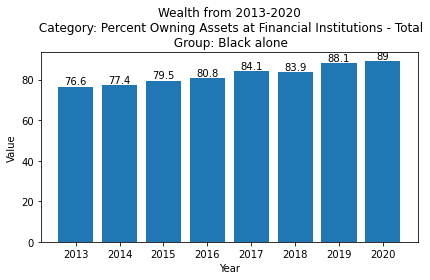

In [9]:
dataLocation = '/Users/mtjen/desktop/table_data/'
isWealth = True
table = 2
category = 'Percent Owning Assets at Financial Institutions'
subCat = 'Total'
group = 'Race'
subGroup = 'Black alone'

test = Visualize_Census(dataLocation, isWealth, table, category, subCat, group, subGroup)
test.main()

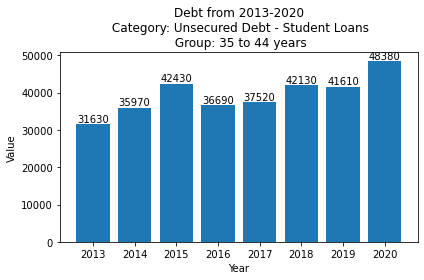

In [10]:
dataLocation = '/Users/mtjen/desktop/table_data/'
isWealth = False
table = 3
category = 'Unsecured Debt'
subCat = 'Student Loans'
group = 'Age of Householder'
subGroup = '35 to 44 years'

test = Visualize_Census(dataLocation, isWealth, table, category, subCat, group, subGroup)
test.main()